In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("./train.csv")
display(df_train.head())

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1


In [3]:
print(df_train.isnull().sum())
print(df_train.info())
print(df_train.shape)

index                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3000 non-null   int64  
 1   Pregnancies               3000 non-null   int64  
 2   Glucose                   3000 non-null   int64  
 3   BloodPressure             3000 non-null   int64  
 4   SkinThickness             3000 non-null   int64  
 5   Insulin                   3000 non-null   int64  
 6   BMI                       3000 non-null   float64
 7   DiabetesPedigreeFunction  3000 non-null   float64
 8   Age                      

In [4]:
display(df_train.corr())

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
index,1.000000,0.003418,0.036222,0.024221,-0.005473,0.004264,-0.022387,0.027093,0.015610,0.010270
Pregnancies,0.003418,1.000000,0.067360,-0.008811,0.003640,-0.034456,0.011715,-0.027216,0.421213,0.197909
Glucose,0.036222,0.067360,1.000000,0.007822,0.022918,0.010135,0.013754,0.053021,0.035148,0.064677
BloodPressure,0.024221,-0.008811,0.007822,1.000000,0.042476,0.040159,0.242601,0.098362,0.023235,0.051347
SkinThickness,-0.005473,0.003640,0.022918,0.042476,1.000000,0.167506,0.092715,0.141789,0.028481,0.001112
Insulin,0.004264,-0.034456,0.010135,0.040159,0.167506,1.000000,0.168287,0.219013,0.047494,0.079457
BMI,-0.022387,0.011715,0.013754,0.242601,0.092715,0.168287,1.000000,0.067524,0.082661,0.244350
DiabetesPedigreeFunction,0.027093,-0.027216,0.053021,0.098362,0.141789,0.219013,0.067524,1.000000,0.072471,0.099075
Age,0.015610,0.421213,0.035148,0.023235,0.028481,0.047494,0.082661,0.072471,1.000000,0.266000
Outcome,0.010270,0.197909,0.064677,0.051347,0.001112,0.079457,0.244350,0.099075,0.266000,1.000000


In [5]:
df_train_yes = df_train[df_train["Outcome"]==1]
df_train_no = df_train[df_train["Outcome"]==0]
display(df_train_yes.head())
display(df_train_no.head())
print(df_train_yes.shape)
print(df_train_no.shape)

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
4,3644,5,107,78,44,284,52.935068,0.284959,45,1
6,2203,2,138,86,30,0,32.804714,0.269270,27,1
7,565,1,123,52,0,0,39.865034,0.714738,45,1
10,4818,9,125,76,28,0,39.813548,0.163193,45,1


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
5,3323,5,84,64,0,0,33.459536,0.505127,26,0
8,1386,1,138,76,30,0,39.660380,0.503107,23,0


(717, 10)
(2283, 10)


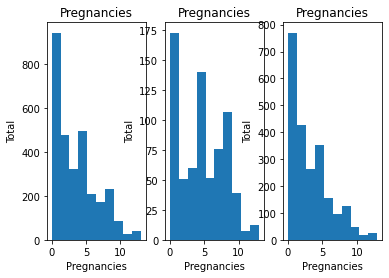

In [11]:
fig = plt.figure()
#妊娠した回数
axes1 = fig.add_subplot(1,3,1)
axes1.hist(data=df_train,x="Pregnancies",bins=10)
axes1.set_title("Pregnancies")
axes1.set_xlabel("Pregnancies")
axes1.set_ylabel("Total")
axes2 = fig.add_subplot(1,3,2)
axes2.hist(data=df_train_yes,x="Pregnancies",bins=10)
axes2.set_title("Pregnancies")
axes2.set_xlabel("Pregnancies")
axes2.set_ylabel("Total")
axes3 = fig.add_subplot(1,3,3)
axes3.hist(data=df_train_no,x="Pregnancies",bins=10)
axes3.set_title("Pregnancies")
axes3.set_xlabel("Pregnancies")
axes3.set_ylabel("Total")
plt.show()

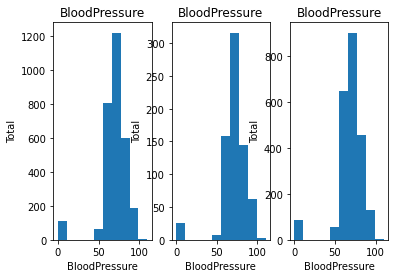

In [13]:
fig = plt.figure()
#拡張期血圧
axes1 = fig.add_subplot(1,3,1)
axes1.hist(data=df_train,x="BloodPressure",bins=10)
axes1.set_title("BloodPressure")
axes1.set_xlabel("BloodPressure")
axes1.set_ylabel("Total")
axes2 = fig.add_subplot(1,3,2)
axes2.hist(data=df_train_yes,x="BloodPressure",bins=10)
axes2.set_title("BloodPressure")
axes2.set_xlabel("BloodPressure")
axes2.set_ylabel("Total")
axes3 = fig.add_subplot(1,3,3)
axes3.hist(data=df_train_no,x="BloodPressure",bins=10)
axes3.set_title("BloodPressure")
axes3.set_xlabel("BloodPressure")
axes3.set_ylabel("Total")
plt.show()

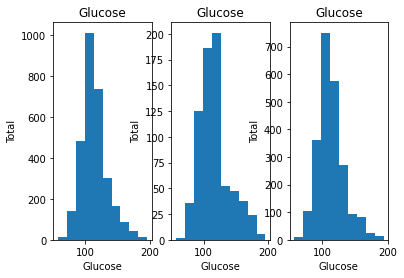

In [12]:
fig = plt.figure()
#経口ブドウ糖負荷試験における2時間の血漿ブドウ糖濃度
axes1 = fig.add_subplot(1,3,1)
axes1.hist(data=df_train,x="Glucose",bins=10)
axes1.set_title("Glucose")
axes1.set_xlabel("Glucose")
axes1.set_ylabel("Total")
axes2 = fig.add_subplot(1,3,2)
axes2.hist(data=df_train_yes,x="Glucose",bins=10)
axes2.set_title("Glucose")
axes2.set_xlabel("Glucose")
axes2.set_ylabel("Total")
axes3 = fig.add_subplot(1,3,3)
axes3.hist(data=df_train_no,x="Glucose",bins=10)
axes3.set_title("Glucose")
axes3.set_xlabel("Glucose")
axes3.set_ylabel("Total")
plt.show()

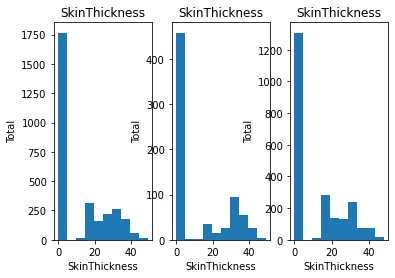

In [14]:
fig = plt.figure()
#皮膚のひだの厚さ
axes1 = fig.add_subplot(1,3,1)
axes1.hist(data=df_train,x="SkinThickness",bins=10)
axes1.set_title("SkinThickness")
axes1.set_xlabel("SkinThickness")
axes1.set_ylabel("Total")
axes2 = fig.add_subplot(1,3,2)
axes2.hist(data=df_train_yes,x="SkinThickness",bins=10)
axes2.set_title("SkinThickness")
axes2.set_xlabel("SkinThickness")
axes2.set_ylabel("Total")
axes3 = fig.add_subplot(1,3,3)
axes3.hist(data=df_train_no,x="SkinThickness",bins=10)
axes3.set_title("SkinThickness")
axes3.set_xlabel("SkinThickness")
axes3.set_ylabel("Total")
plt.show()

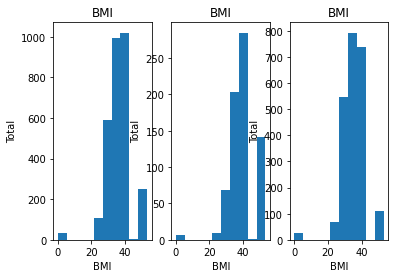

In [16]:
fig = plt.figure()
#血清インスリン
axes1 = fig.add_subplot(1,3,1)
axes1.hist(data=df_train,x="BMI",bins=10)
axes1.set_title("BMI")
axes1.set_xlabel("BMI")
axes1.set_ylabel("Total")
axes2 = fig.add_subplot(1,3,2)
axes2.hist(data=df_train_yes,x="BMI",bins=10)
axes2.set_title("BMI")
axes2.set_xlabel("BMI")
axes2.set_ylabel("Total")
axes3 = fig.add_subplot(1,3,3)
axes3.hist(data=df_train_no,x="BMI",bins=10)
axes3.set_title("BMI")
axes3.set_xlabel("BMI")
axes3.set_ylabel("Total")
plt.show()

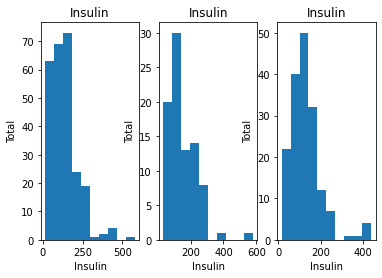

(256, 10)


In [39]:
fig = plt.figure()
#BMI
df_train_insulin = df_train[df_train["Insulin"]>0]
df_train_yes_insulin = df_train_yes[df_train_yes["Insulin"]>0]
df_train_no_insulin = df_train_no[df_train_no["Insulin"]>0]
axes1 = fig.add_subplot(1,3,1)
axes1.hist(data=df_train_insulin,x="Insulin",bins=10)
axes1.set_title("Insulin")
axes1.set_xlabel("Insulin")
axes1.set_ylabel("Total")
axes2 = fig.add_subplot(1,3,2)
axes2.hist(data=df_train_yes_insulin,x="Insulin",bins=10)
axes2.set_title("Insulin")
axes2.set_xlabel("Insulin")
axes2.set_ylabel("Total")
axes3 = fig.add_subplot(1,3,3)
axes3.hist(data=df_train_no_insulin,x="Insulin",bins=10)
axes3.set_title("Insulin")
axes3.set_xlabel("Insulin")
axes3.set_ylabel("Total")
plt.show()
print(df_train_insulin.shape)

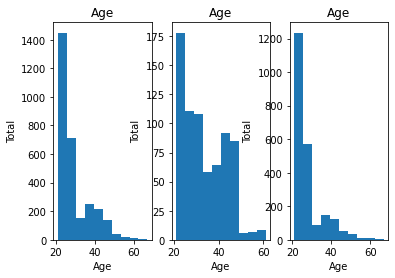

In [17]:
fig = plt.figure()
#年齢
axes1 = fig.add_subplot(1,3,1)
axes1.hist(data=df_train,x="Age",bins=10)
axes1.set_title("Age")
axes1.set_xlabel("Age")
axes1.set_ylabel("Total")
axes2 = fig.add_subplot(1,3,2)
axes2.hist(data=df_train_yes,x="Age",bins=10)
axes2.set_title("Age")
axes2.set_xlabel("Age")
axes2.set_ylabel("Total")
axes3 = fig.add_subplot(1,3,3)
axes3.hist(data=df_train_no,x="Age",bins=10)
axes3.set_title("Age")
axes3.set_xlabel("Age")
axes3.set_ylabel("Total")
plt.show()

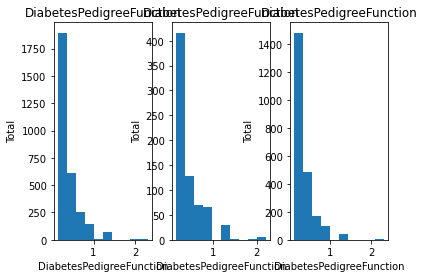

In [18]:
fig = plt.figure()
#糖尿病血統
axes1 = fig.add_subplot(1,3,1)
axes1.hist(data=df_train,x="DiabetesPedigreeFunction",bins=10)
axes1.set_title("DiabetesPedigreeFunction")
axes1.set_xlabel("DiabetesPedigreeFunction")
axes1.set_ylabel("Total")
axes2 = fig.add_subplot(1,3,2)
axes2.hist(data=df_train_yes,x="DiabetesPedigreeFunction",bins=10)
axes2.set_title("DiabetesPedigreeFunction")
axes2.set_xlabel("DiabetesPedigreeFunction")
axes2.set_ylabel("Total")
axes3 = fig.add_subplot(1,3,3)
axes3.hist(data=df_train_no,x="DiabetesPedigreeFunction",bins=10)
axes3.set_title("DiabetesPedigreeFunction")
axes3.set_xlabel("DiabetesPedigreeFunction")
axes3.set_ylabel("Total")
plt.show()

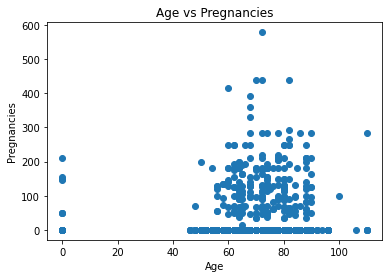

In [25]:
scatter_plot = plt.figure()
axes4 = scatter_plot.add_subplot(1,1,1)
axes4.scatter(data=df_train,x="BloodPressure",y="Insulin")

axes4.set_title("Age vs Pregnancies")
axes4.set_xlabel("Age")
axes4.set_ylabel("Pregnancies")

plt.show()


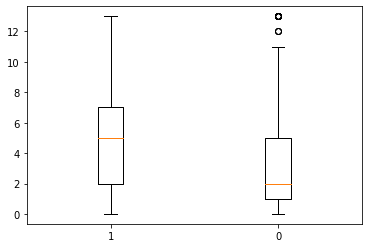

In [30]:
boxplot = plt.figure()
axes5 = boxplot.add_subplot(1,1,1)
axes5.boxplot(x=[df_train.loc[df_train["Outcome"]==1]["Pregnancies"],df_train.loc[df_train["Outcome"]==0]["Pregnancies"],],labels=["1","0"])
plt.show()

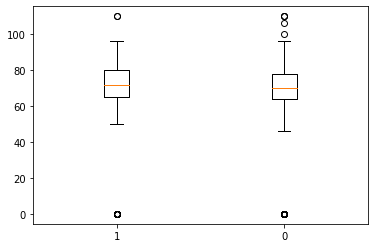

In [31]:
boxplot = plt.figure()
axes5 = boxplot.add_subplot(1,1,1)
axes5.boxplot(x=[df_train.loc[df_train["Outcome"]==1]["BloodPressure"],df_train.loc[df_train["Outcome"]==0]["BloodPressure"],],labels=["1","0"])
plt.show()

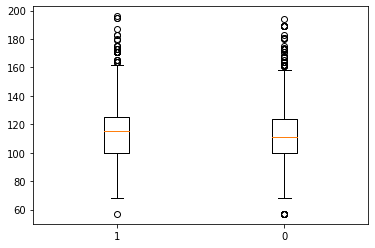

In [32]:
boxplot = plt.figure()
axes5 = boxplot.add_subplot(1,1,1)
axes5.boxplot(x=[df_train.loc[df_train["Outcome"]==1]["Glucose"],df_train.loc[df_train["Outcome"]==0]["Glucose"],],labels=["1","0"])
plt.show()

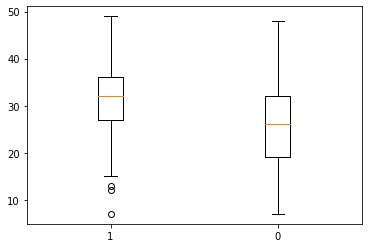

In [10]:
boxplot = plt.figure()
axes5 = boxplot.add_subplot(1,1,1)
df_train_skin = df_train[df_train["SkinThickness"]>0]
axes5.boxplot(x=[df_train_skin.loc[df_train_skin["Outcome"]==1]["SkinThickness"],df_train_skin.loc[df_train_skin["Outcome"]==0]["SkinThickness"],],labels=["1","0"])
plt.show()

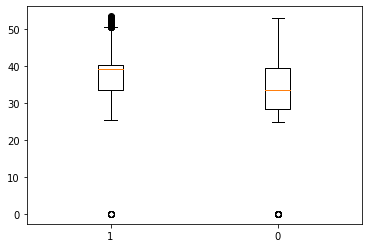

In [34]:
boxplot = plt.figure()
axes5 = boxplot.add_subplot(1,1,1)
axes5.boxplot(x=[df_train.loc[df_train["Outcome"]==1]["BMI"],df_train.loc[df_train["Outcome"]==0]["BMI"],],labels=["1","0"])
plt.show()

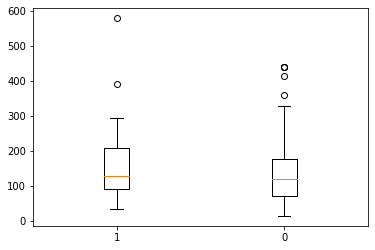

In [7]:
boxplot = plt.figure()
axes5 = boxplot.add_subplot(1,1,1)
df_train_insulin = df_train[df_train["Insulin"]>0]
axes5.boxplot(x=[df_train_insulin.loc[df_train_insulin["Outcome"]==1]["Insulin"],df_train_insulin.loc[df_train_insulin["Outcome"]==0]["Insulin"],],labels=["1","0"])
plt.show()

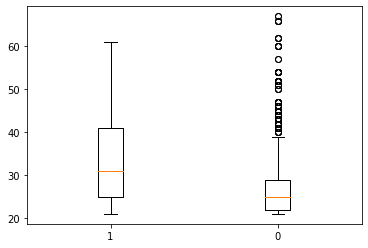

In [36]:
boxplot = plt.figure()
axes5 = boxplot.add_subplot(1,1,1)
axes5.boxplot(x=[df_train.loc[df_train["Outcome"]==1]["Age"],df_train.loc[df_train["Outcome"]==0]["Age"],],labels=["1","0"])
plt.show()

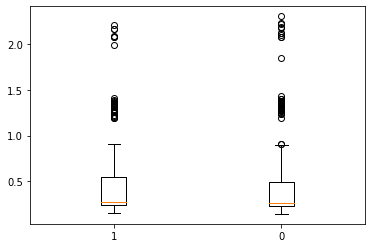

In [4]:
boxplot = plt.figure()
axes5 = boxplot.add_subplot(1,1,1)
axes5.boxplot(x=[df_train.loc[df_train["Outcome"]==1]["DiabetesPedigreeFunction"],df_train.loc[df_train["Outcome"]==0]["DiabetesPedigreeFunction"],],labels=["1","0"])
plt.show()

In [3]:
display(df_train["Insulin"].describe())

count    3000.000000
mean       11.663333
std        45.064090
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       579.000000
Name: Insulin, dtype: float64

In [6]:
display(df_train["Insulin"].value_counts())

0      2744
180      18
100      17
130      16
92       13
210      11
50       10
60        8
284       7
249       7
66        7
120       6
156       6
126       6
148       5
48        5
132       5
115       5
70        5
165       5
36        5
96        5
135       5
54        5
45        4
145       4
200       4
71        4
192       4
140       4
95        3
49        3
63        3
250       3
176       3
440       3
82        3
37        2
94        2
182       2
220       2
88        2
110       2
205       2
392       1
293       1
265       1
15        1
360       1
190       1
108       1
81        1
415       1
105       1
579       1
116       1
52        1
74        1
330       1
Name: Insulin, dtype: int64

In [9]:
display(df_train["SkinThickness"].value_counts())

0     1766
19     106
30      87
18      86
33      79
29      77
15      69
32      62
37      61
27      59
22      55
17      52
36      51
39      51
20      48
25      47
31      37
28      26
23      25
21      22
41      17
44      16
26      15
45      14
40      13
42      11
38       8
35       8
13       7
24       7
14       5
16       3
46       3
7        2
10       2
48       1
12       1
49       1
Name: SkinThickness, dtype: int64